In [5]:
import pymc3 as pm
import numpy as np
import pandas as pd
from scipy import stats as stats
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt

In [6]:
with pm.Model() as model:
    p = pm.Beta('p', lower=0, upper=1)

In [22]:
#set constants
p_true = 0.05  # remember, this is unknown.
N = 15

# sample N Bernoulli random variables from Ber(0.05).
# each random variable has a 0.05 chance of being a 1.
# this is the data-generation step
occurrences = stats.bernoulli.rvs(p_true, size=N)

print(occurrences) # Remember: Python treats True == 1, and False == 0
print(np.sum(occurrences))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
1


In [23]:
# Occurrences.mean is equal to n/N.
print("What is the observed frequency in Group A? %.4f" % np.mean(occurrences))
print("Does this equal the true frequency? %s" % (np.mean(occurrences) == p_true))

What is the observed frequency in Group A? 0.0667
Does this equal the true frequency? False


In [24]:
#include the observations, which are Bernoulli
with model:
    obs = pm.Bernoulli("obs_2", p, observed=occurrences)
    # To be explained in chapter 3
    step = pm.Metropolis()
    trace = pm.sample(18000, step=step)
    burned_trace = trace[1000:]

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [p]
Sampling 4 chains, 0 divergences: 100%|██████████| 74000/74000 [00:15<00:00, 4846.80draws/s]
The number of effective samples is smaller than 25% for some parameters.


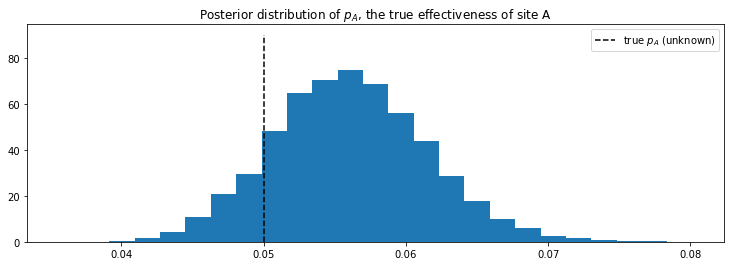

In [25]:
figsize(12.5, 4)
plt.title("Posterior distribution of $p_A$, the true effectiveness of site A")
plt.vlines(p_true, 0, 90, linestyle="--", label="true $p_A$ (unknown)",color='black')
plt.hist(burned_trace["p"], bins=25, histtype="stepfilled", density=True)
plt.legend();

In [ ]:
with pm.Model() as model2:
    p = pm.Beta('p',)